# Bike Sharing Assignment

### Problem Statement:

#### About the System:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

#### Their reasons for approaching us:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

#### How have they collected data?
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### The Business Problem
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [431]:
# Importing Basic Datasets

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [432]:
# Importing the dataset

bikes = pd.read_csv('day.csv')

In [433]:
# View the dataframe

bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [434]:
bikes.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


## 1. Data Exploration - Understanding the Data


In [435]:
# Checking the shape of the dataframe

bikes.shape

(730, 16)

There are 730 rows and 16 columns. <br> <br>
### What are the different variables present?
- <b>instant</b>: The index of the particular record/row
- <b>dteday</b>: The date
- <b>season</b>: Seasons. There are 4 categories.
    - 1 : Spring
    - 2 : Summer 
    - 3 : Fall 
    - 4: Winter
- <b>yr</b>: Year. We have data for only 2 years - 2018 and 2019.
    - 0 : 2018
    - 1 : 2019
- <b>mnth</b>: Month. Values range from 1-12.
- <b>holiday</b>: Weather the day is a holiday.
    - 0 : Not a Holiday
    - 1 : Holiday
- <b>weekday</b>: Day of the week. Values range from 0-6
- <b>workingday</b>: If the day is working.
    - 0 : Neither weekend nor holiday
    - 1 : Not a working day
- <b>weathersit</b>: The weather on that particular day
    - 1 : Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2 : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3 : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4 : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- <b>temp</b>: Temperature in Celsius
- <b>atemp</b>: Feeling temperature in Celsius
- <b>hum</b>: Humidity (in Percentage)
- <b>windspeed</b>: Wind speed
- <b>casual</b>: Count of casual users. Casual users are users who use the service occasionally or don't have a subscription to the service.
- <b>registered</b>: Count of registered users. Registered users are those who register for an annual or 30-day membership and rent more frequently
- <b>cnt</b>: `TARGET` Count of total rental bikes including both casual and registered


### Do I need all these variables?
I have judged the following variables to be redundant. The reason for doing so is also mentioned.
- <b>instant</b>: The instant is just the index of the row and hence won't help us in the process of modelling.
- <b>dteday</b>: This is the date of the instance and won't be of any help in the process of modelling. We have variables like mnth and yr which will suffice.

<b>Dropping `instant` and `dteday`</b>

In [436]:
# Dropping the above variables

bikes.drop(['instant', 'dteday'], axis=1, inplace=True)
bikes.shape

(730, 14)

### cnt, registered and casual
We know that `cnt = registered + casual`. Our objective is to predict the total count of bikes and not by specific category. Therefore we can drop registered and casual. <br>
<b>Dropping `registered and casual`</b>

In [437]:
# Dropping registered and casual

bikes.drop(['registered', 'casual'], axis=1, inplace=True)
bikes.shape

(730, 12)

## 2. Data Quality Check

In [438]:
# Checking the dataframe for missing values

bikes.isna().mean()*100

season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

<b>The dataframe has no missing values.</b>

In [439]:
# Checking the datatypes of the variables

bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


There are categorical variables that are currently numerical in nature. Some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them. These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case. Therefore, <br>
`I will convert such feature values into categorical string values before proceeding further.`

### season
Seasons. There are 4 categories. 
- 1 : Spring
- 2 : Summer 
- 3 : Fall 
- 4: Winter

In [440]:
# Replacing these values with their string values

bikes.season.replace((1,2,3,4), ('spring', 'summer', 'fall', 'winter'), inplace=True)
bikes.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

### yr
Change it to category type as it is a binary variables

In [441]:
# Changing the dtype

bikes.yr = bikes.yr.astype('category')

In [442]:
# Verifying

bikes.yr.dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

### mnth
Month. Values in a range from 1-12

In [443]:
# Replacing these values with their string values

bikes.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'), inplace=True)
bikes.mnth.value_counts()

may    62
oct    62
aug    62
jan    62
mar    62
jul    62
dec    62
sep    60
nov    60
apr    60
jun    60
feb    56
Name: mnth, dtype: int64

### weekday
Values range from 0-6.

In [444]:
# Replacing these values with their string values

bikes.weekday.replace((0,1,2,3,4,5,6), ('sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat'), inplace=True)
bikes.weekday.value_counts()

tue    105
mon    105
sat    104
sun    104
thu    104
wed    104
fri    104
Name: weekday, dtype: int64

### weathersit
The weather on that particular day
- 1 : `clear` Clear, Few clouds, Partly cloudy, Partly cloudy
- 2 : `misty` Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3 : `lrainsnow` Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4 : `hrainsnow` Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [445]:
# Replacing these values with their string values

bikes.weathersit.replace((1,2,3,4), ('clear', 'misty', 'lrainsnow', 'hrainsnow'), inplace=True)
bikes.weathersit.value_counts()

clear        463
misty        246
lrainsnow     21
Name: weathersit, dtype: int64

## 3. Data Analysis 

## Categorical Variable Analysis
The following variables:
- season
- yr
- mnth
- holiday
- weekday
- workingday
- weathersit

In [446]:
# Defining a function to return a mutli boxplot

def multi_boxplot(data, vars_list, y):
    l = len(vars_list)
    
    # Number of columns is fixed
    no_cols = 4
    
    # Number of rows calculated based on the length of the list
    no_rows = int(np.ceil(l/4))
    
    # Total height of the figure
    h_row = 4*no_rows
    
    # Width of the figure
    w_row = 16
    
    # Define the subplot and the figure size
    figure, axes = plt.subplots(nrows=no_rows, ncols=no_cols, figsize=(w_row, h_row))
    
    # Define a list to contain all the axes indexes
    axes_list = []
    
    # To get an indexes of the boxplots
    for i in range(no_rows):
        for j in range(no_cols):
            axes_list.append([i,j])
            
    # To plot the figure
    for i, t in enumerate(vars_list):
        ax_val = axes_list[i]
        a = ax_val[0]
        b = ax_val[1]
        sns.boxplot(ax = axes[a, b], data=data, x=t, y=y)
        
    plt.tight_layout()


In [447]:
# Define a function to return categorical statistics

def cat_stats(col):
    cat_df = bikes.groupby(col)['cnt'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
    
    cat_df['perc_sum']=cat_df['sum']/bikes.cnt.sum()*100
    
    return round(cat_df, 2)

In [448]:
# Define a function to return plots for categorical variables

def cat_plots( col, x, y):
    
    # Defining the size of the plot
    plt.figure(figsize = (x, y))
    
    # First Subplot
    plt.subplot(1, 2, 1)
    sns.barplot(x = col, y = 'cnt', data=bikes)
    
    # Second Subplot
    plt.subplot(1, 2, 2)
    sns.barplot(x = col, y = 'cnt', data = bikes, hue = 'yr', palette = 'cool')
    
    # Return
    
    return

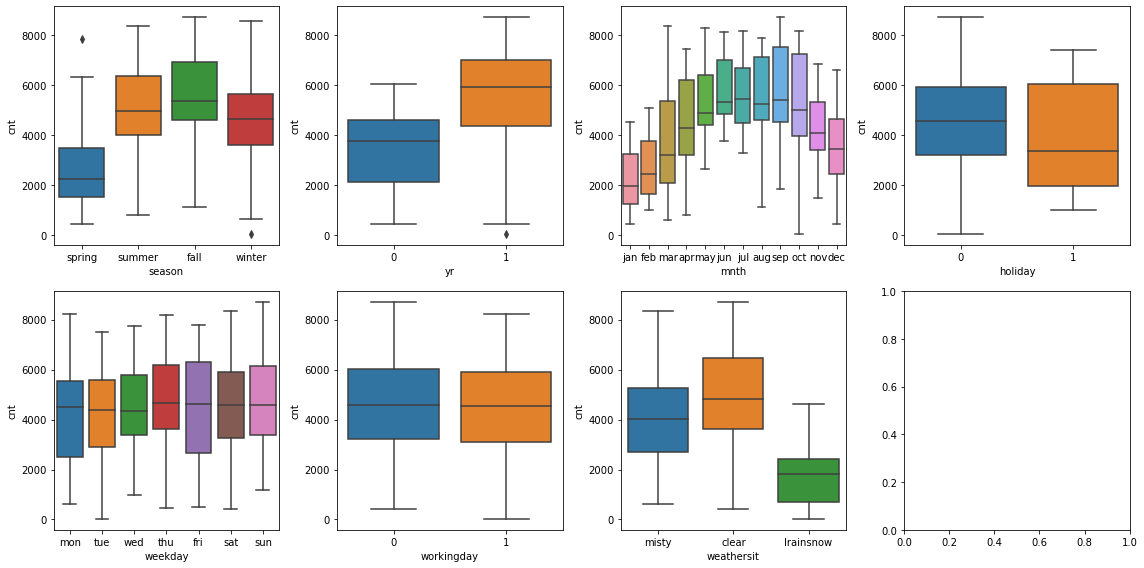

In [449]:
# Running multi-boxplot on our categorical variables

multi_boxplot(bikes, ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'], y='cnt')

### `season`

In [450]:
# Descriptive Statistics

cat_stats('season')

,sum,mean,count,perc_sum
season,,,,
fall,1061129,5644.30,188,32.24
summer,918589,4992.33,184,27.91
winter,841613,4728.16,178,25.57
spring,469514,2608.41,180,14.27


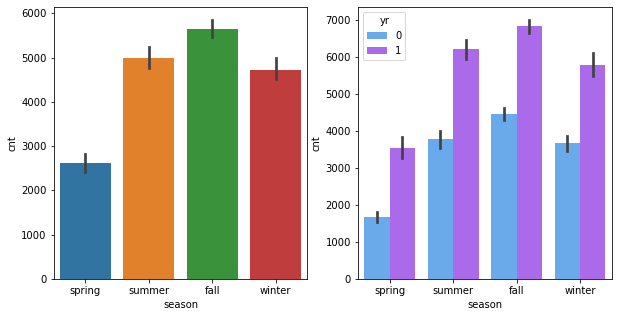

In [451]:
# Plots

cat_plots('season', 10, 5)

#### Observations
- Fall experieces the highest percentage of bookings at `32%` with a median value of above 5000 bookings (for 2 years) 
- Summer and Winter follow with `28%` and `25%` of the total bookings respectively. 
- 2019 had a higher number of bookings as compared to 2018. This suggests that `yr` also can be a good predictor for the dependant variable.
- This suggests that `season` can be a good predictor of the dependant variable

### `mnth`

In [452]:
# Descriptive Statistics

cat_stats('mnth')

,sum,mean,count,perc_sum
mnth,,,,
aug,351194,5664.42,62,10.67
jun,346342,5772.37,60,10.52
sep,345991,5766.52,60,10.51
jul,344948,5563.68,62,10.48
may,331686,5349.77,62,10.08
oct,322352,5199.23,62,9.80
apr,269094,4484.90,60,8.18
nov,254831,4247.18,60,7.74
mar,228920,3692.26,62,6.96


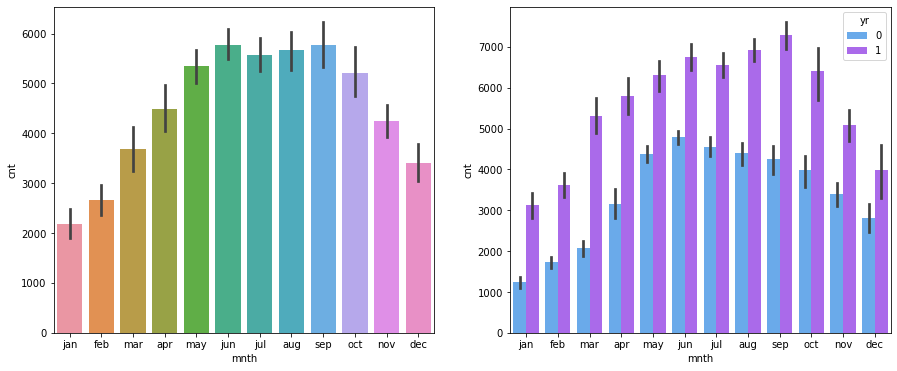

In [453]:
# Plots

cat_plots('mnth', 15, 6)

#### Observations
- The preiod from May-October witnessed the highest number of bookings. Each month of this period contributes to 10% or more of the total bookings. Their median values are also above 4000 (for 2 years)
- This suggests that `mnth` could be a good predictor for our dependant variable

### `holiday`

In [454]:
# Descriptive Statistics

cat_stats('holiday')

,sum,mean,count,perc_sum
holiday,,,,
0,3212410,4530.9,709,97.62
1,78435,3735.0,21,2.38


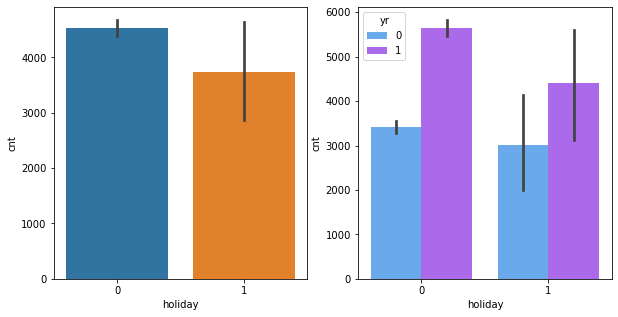

In [455]:
# Plots

cat_plots('holiday', 10, 5)

#### Observations
- 97% of the bike rentals have occured during working days. This indicates that most of our rentals occur during working days.
- This definitely suggests that `holiday` is a good predictor for the dependant variable.

### `weekday`

In [456]:
# Descriptive Statistics

cat_stats('weekday')

,sum,mean,count,perc_sum
weekday,,,,
thu,487923,4691.57,104,14.83
sun,485235,4665.72,104,14.74
sat,481176,4626.69,104,14.62
fri,478132,4597.42,104,14.53
wed,462276,4444.96,104,14.05
tue,448822,4274.50,105,13.64
mon,447281,4259.82,105,13.59


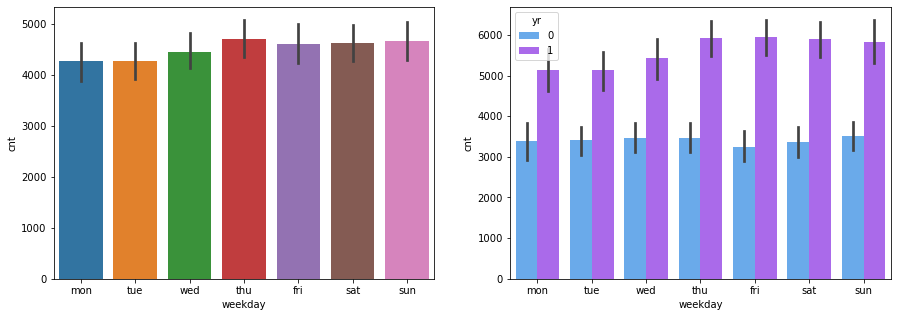

In [457]:
# Plots

cat_plots('weekday', 15, 5)

#### Observations
- The perc_sum for all the weekdays lie in a similar range (13.5% - 14.8%) and all their medians lie between 4000 and 5000.
- This could indicate that `weekday` could have less or no influence on the dependant variable. 

### `workingday`

In [458]:
# Descriptive Statistics

cat_stats('workingday')

,sum,mean,count,perc_sum
workingday,,,,
1,2253988,4472.20,504,68.49
0,1036857,4587.86,226,31.51


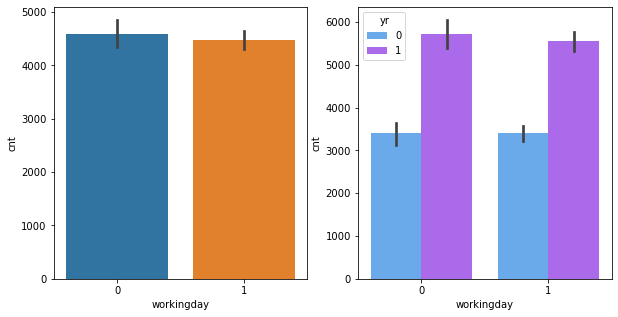

In [459]:
# Plots

cat_plots('workingday', 10, 5)

#### Observations
- 68% of all our rentals occured on working day. 
- Both working and non-working days had a median close to 5000 bookings (for 2 years)
- This suggests that `workingday` could be a good predictor of the dependant variable

### `weathersit`

In [460]:
# Descriptive Statistics

cat_stats('weathersit')

,sum,mean,count,perc_sum
weathersit,,,,
clear,2257952,4876.79,463,68.61
misty,995024,4044.81,246,30.24
lrainsnow,37869,1803.29,21,1.15


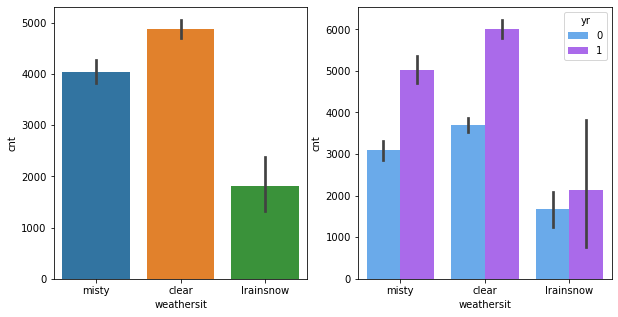

In [461]:
# Plots

cat_plots('weathersit', 10, 5)

#### Observations
- 68% of all our bookings occured on clear days with a median value of almost 5000 bookings.
- This is followed by mist days accounting for 30% of all bookings with a median value of 4000 bookings.
- This suggestst that `weathersit` is a good predictor for our dependant variables

## Numerical Variable Analysis
The following variables:
- temp
- atemp
- hum
- windspeed
- cnt

In [462]:
# Extract a list of numerical variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
num_vars

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

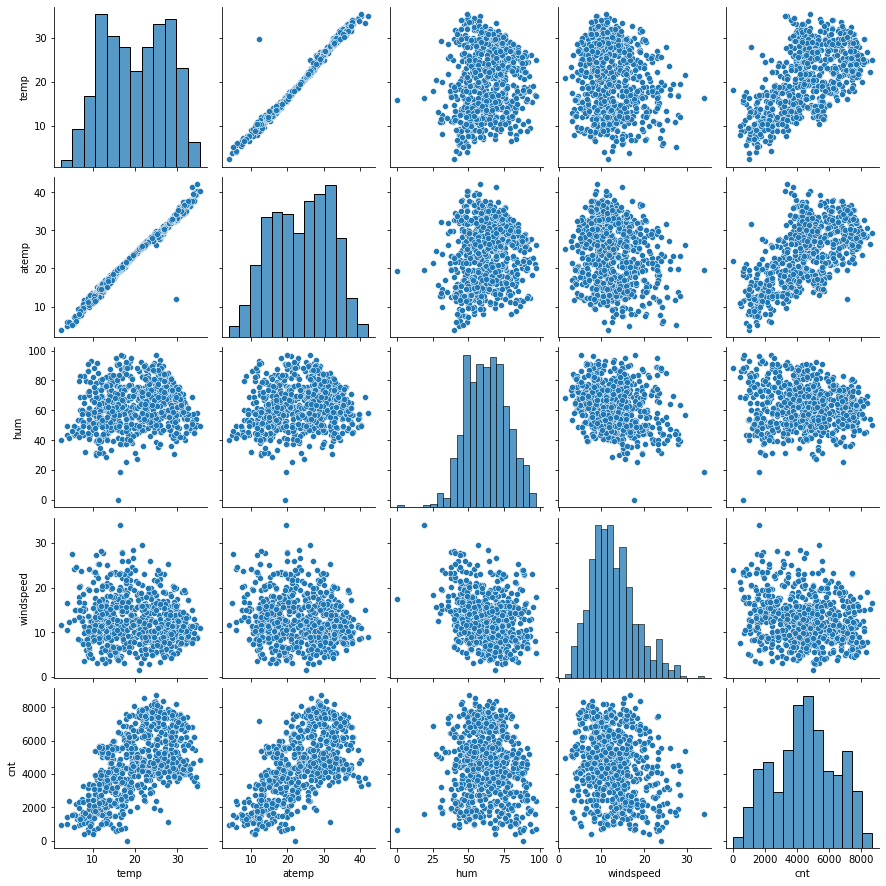

In [463]:
# Generating a pairplot to see the relationships among Numerical Variables

sns.pairplot(bikes[num_vars])
plt.show()

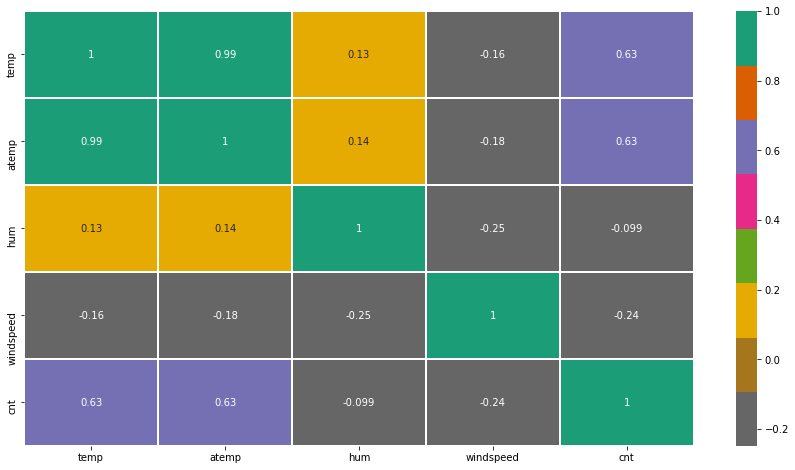

In [464]:
# Generating a heatmap to see the correlations

plt.figure(figsize=(15,8))
sns.heatmap(bikes[num_vars].corr(), linewidth=1, annot=True, cmap='Dark2_r')
plt.show()

#### Observations
- Both `temp` and `atemp` have a high correlation with `cnt`. 
- `temp` and `atemp` exhibit a strong linear relationship. We cannot use both these variables in our model as the multicollinearity will make it more difficult to specify the correct model.


## 4. Data Preparation

### 4.1 Creating Dummy Variables for Categorical Variables
- season
- mnth
- weekday
- weathersit

In [465]:
# To get an overview of all column names

bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [466]:
# season

season_d = pd.get_dummies(bikes['season'], drop_first = True)
season_d.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [467]:
# mnth

mnth_d = pd.get_dummies(bikes['mnth'], drop_first = True)
mnth_d.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [468]:
# weekday

weekday_d = pd.get_dummies(bikes['weekday'], drop_first = True)
weekday_d.head()

,mon,sat,sun,thu,tue,wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [469]:
# weathersit

weathersit_d = pd.get_dummies(bikes['weathersit'], drop_first = True)
weathersit_d.head()

,lrainsnow,misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [470]:
# Merging dataframes into a new dataframe called bikes_mod

bikes_mod = pd.concat([bikes, season_d, mnth_d, weekday_d, weathersit_d], axis = 1)
bikes_mod.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sep,mon,sat,sun,thu,tue,wed,lrainsnow,misty
0,spring,0,jan,0,mon,1,misty,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,jan,0,tue,1,misty,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [471]:
# Shape of bikes_mod

bikes_mod.shape

(730, 34)

In [472]:
# Dropping the redundant columns

bikes_mod.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1, inplace=True)
bikes_mod.shape

(730, 30)

## 5. Data Splitting and Preparation

### 5.1 Splitting the Data

In [473]:
# Importing the packages required for this step

from sklearn.model_selection import train_test_split

Why np.random.seed ? <br>
(pseudo-)Random numbers work by starting with a number (the seed), multiplying it by a large number, adding an offset, then taking modulo of that sum. The resulting number is then used as the seed to generate the next "random" number. When you set the seed (every time), it does the same thing every time, giving you the same numbers.

In [474]:
# Setting the seed

np.random.seed(0)

Why random_state ? <br>
This is to check and validate the data when running the code multiple times. Setting random_state a fixed value will guarantee that the same sequence of random numbers is generated each time you run the code.

In [475]:
# Performing the split

bikes_train, bikes_test = train_test_split(bikes_mod, train_size = 0.7, test_size = 0.3, random_state = 100)

In [476]:
# Verifying the split

# Shape of training set

bikes_train.shape

(510, 30)

In [477]:
# Description of training set

bikes_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,lrainsnow,misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.711765,20.102429,23.493909,63.112926,12.831318,4486.382353,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.157763,0.453386,7.431169,8.090038,14.156632,5.291832,1952.158739,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,20.209597,24.020400,63.437500,12.083182,4530.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [478]:
# Shape of test set

bikes_test.shape

(219, 30)

In [479]:
# Description of test set

bikes_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,lrainsnow,misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,0.639269,20.815737,24.255828,61.961883,12.600130,4546.981735,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.188034,0.481313,7.689600,8.299641,14.456669,4.984858,1898.633630,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,3.957390,4.941955,25.416700,1.500244,441.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,14.093750,17.085500,51.166700,9.021282,3303.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,20.807500,24.873150,60.916700,12.167200,4579.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,27.401653,31.155725,72.192050,15.395629,5869.500000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,34.815847,41.318550,97.250000,27.999836,8395.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We have bikes_train and bikes_test

### 5.2 Rescaling the Data in `Training Data`
Scaling or Feature Scaling as it is more commonly known, is a method to standardize the independant variables present in the data and bring them within a fixed range. This is usually done in the data pre-processing stage to deal with data that is in highly varying magnitudes or units.

In [480]:
# Importing the required package

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [481]:
# Applying scaler to al Numerical columns excluding the binary and dummy variables

scale_list = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

bikes_train[scale_list] = scaler.fit_transform(bikes_train[scale_list])

In [482]:
# Verifying the re-scaling

bikes_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,lrainsnow,misty
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1


In [483]:
bikes_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,lrainsnow,misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 5.3 Checking Correlation Coeffecients

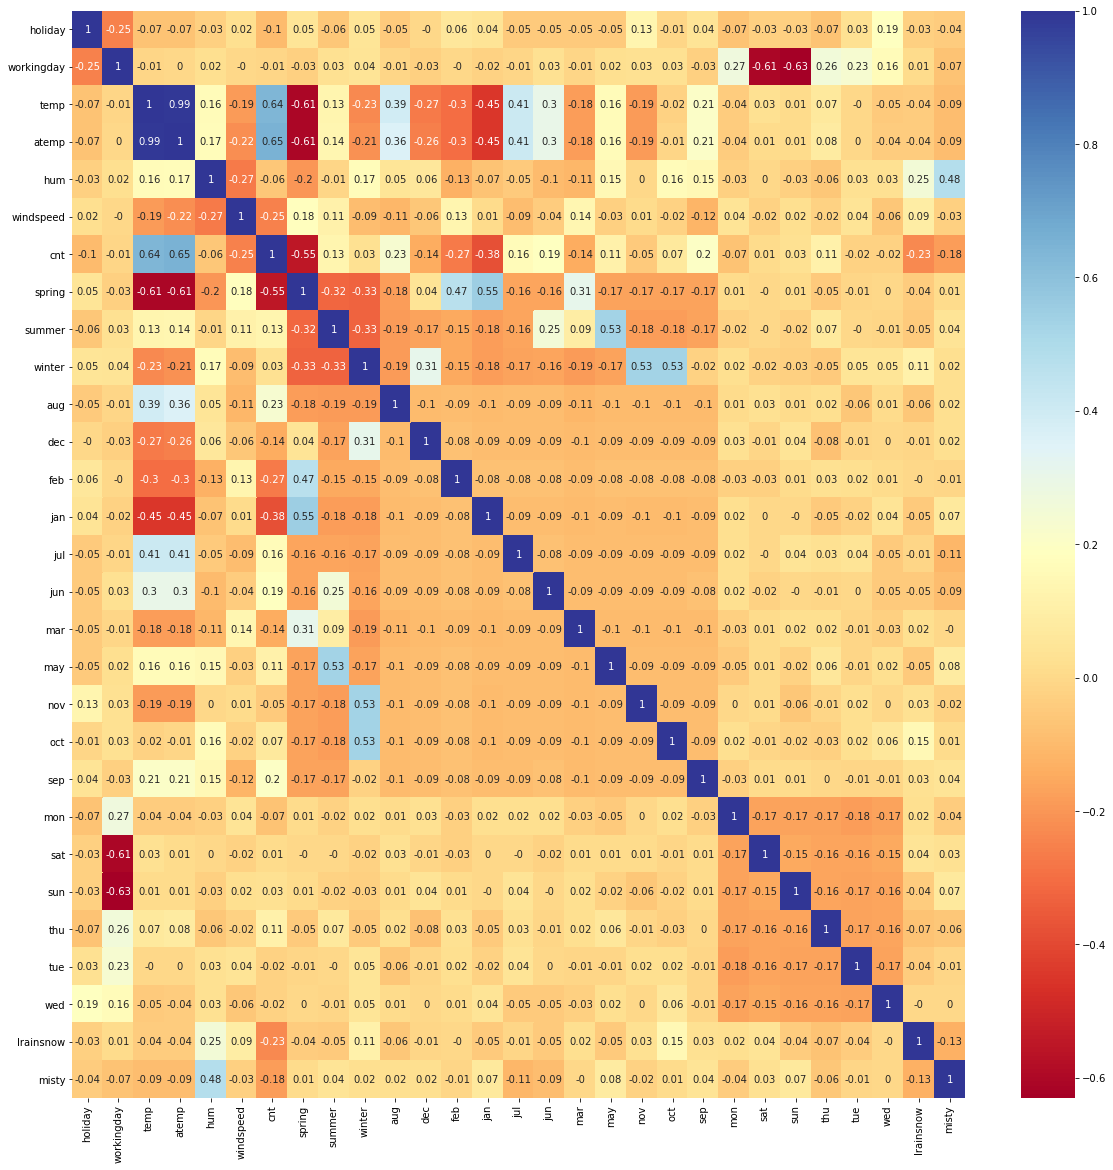

In [485]:
# Plotting a heatmap for all the variables in training data

plt.figure(figsize=(20, 20))
sns.heatmap(round(bikes_train.corr(),2), annot=True, cmap='RdYlBu')
plt.show()

#### Observations:
- `temp` and `atemp` are highly correlated. We cannot use both in our model.
- `temp` and `cnt` have a positive correlation
- `cnt` and `temp` have a positive correlation
- `yr` and `cnt` have a positive correlation
- `humidity` and `misty` have a positive correlation
- `spring` and `cnt` have a negative correlation
- `workingday` and `sat`, `sunday` have a negative correlation
- `temperatures` and `weather conditions` have correlations with different months

## 6. Building a Linear Model

### 6.1 Separating bikes_train into X_train and y_train

In [486]:
# y_train
y_train = bikes_train.pop('cnt')

# X_train
X_train = bikes_train

In [487]:
# Verification for y_train

y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [488]:
# Verification for X_train

X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,lrainsnow,misty
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,1,0,0,0,0,1


### 6.2 Fitting the Regression Line
I will be using the `LinearRegression function from SciKit Learn` for it's compatibility with RFE (Recursive Feature Elimination) <br>
Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. Features are ranked by the model’s coef_ or feature_importances_ attributes, and by recursively eliminating a small number of features per loop, RFE attempts to eliminate dependencies and collinearity that may exist in the model.

#### Coarse Tuning

In [489]:
# Importing the required packages

from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression

In [490]:
# Instance of the LinearRegression object
lm = LinearRegression()

# Fitting the line
lm.fit(X_train, y_train)

# Running RFE
rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [491]:
# Checking parameters that are selected

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 5),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 9),
 ('mar', False, 10),
 ('may', False, 2),
 ('nov', True, 1),
 ('oct', False, 7),
 ('sep', True, 1),
 ('mon', False, 4),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 8),
 ('tue', False, 3),
 ('wed', False, 6),
 ('lrainsnow', True, 1),
 ('misty', True, 1)]

In [492]:
# Storing 15 selected variables into a list 

sel = X_train.columns[rfe.support_]
sel

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'dec', 'feb', 'jan', 'jul', 'nov', 'sep',
       'sat', 'sun', 'lrainsnow', 'misty'],
      dtype='object')

In [493]:
# Which columns has RFE eliminated

X_train.columns[~rfe.support_]

Index(['aug', 'jun', 'mar', 'may', 'oct', 'mon', 'thu', 'tue', 'wed'], dtype='object')

In [494]:
# Create a new dataframe with the selected columns

X_train_rfe = X_train[sel]
X_train_rfe.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,dec,feb,jan,jul,nov,sep,sat,sun,lrainsnow,misty
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,0,1,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,1,0,1


#### Fine Tuning

In [495]:
# Import required packages

# Importing VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing statsmodels as sm
import statsmodels.api as sm

In `statsmodels` we need to explicitly fit a constant using sm.add_constant(X) because if we don't, `statsmodels` fits a regression line passing  through the origin, by default.

In [496]:
# Define a function to calculate VIF

def cal_vif(train_df):
    vif = pd.DataFrame()
    vif['Features'] = train_df.columns
    vif['VIF'] = [variance_inflation_factor(train_df.values, i) for i in range(train_df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    
    return vif

In [497]:
# The train set for first model

X_train0 = X_train_rfe
X_train0.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'dec', 'feb', 'jan', 'jul', 'nov', 'sep',
       'sat', 'sun', 'lrainsnow', 'misty'],
      dtype='object')

What characteristics will we judge our model on? <br>
- Coeffecients: The coeffecients indicate the effect the variables have on the dependant variable.
- P-value: We use hypothesis testing to understand the significance of the coeffecients. A value less than 0.05 is ideal.
- VIF: A variance inflation factor(VIF) detects multicollinearity in regression analysis. Multicollinearity is when there’s correlation between predictors (i.e. independent variables) in a model; it’s presence can adversely affect your regression results. The VIF estimates how much the variance of a regression coefficient is inflated due to multicollinearity in the model. A value under 5 is acceptable.

### 6.3.0 Model 0
- X_train0 = ['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'spring', 'summer', 'winter', 'dec', 'feb', 'jan', 'jul', 'nov', 'sep', 'sat', 'sun', 'lrainsnow', 'misty']
- X_train_lm0 is the df with the constant
- lr0 is the linear model

In [498]:
# VIF values of X_train0

cal_vif(X_train0)

,Features,VIF
3,temp,394.20
4,atemp,371.87
2,workingday,47.36
5,hum,38.35
17,sun,9.52
16,sat,9.17
7,spring,7.15
6,windspeed,5.67
9,winter,5.07
8,summer,3.66


In [499]:
# Creating a new dataframe called X_train_lm0 which we will use to perform the Fine Tuning

X_train_lm0 = sm.add_constant(X_train0)
X_train_lm0.head(1)

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,...,dec,feb,jan,jul,nov,sep,sat,sun,lrainsnow,misty
653,1.0,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,...,0,0,0,0,0,0,0,0,0,0


In [500]:
# Fitting the model

lr0 = sm.OLS(y_train, X_train_lm0).fit()

In [501]:
# Summary

lr0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.3
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          2.51e-185
Time:                        21:02:37   Log-Likelihood:                 518.74
No. Observations:                 510   AIC:                            -995.5
Df Residuals:                     489   BIC:                            -906.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3804      0.081      4.711      0.000       0.222       0.539
yr             0.2304      0.008     28.519      0.000       0.215       0.246
holiday       -0.1335      0.065     -2.040      0.042      -0.262      -0.005
workingday    -0.0548      0.071     -0.775      0.439      -0.194       0.084
temp           0.4322      0.136      3.188      0.002       0.166       0.699
atemp          0.0309      0.137      0.225      0.822      -0.239       0.301
hum           -0.1529      0.038     -4.035      0.000      -0.227      -0.078
windspeed     -0.1876      0.026     -7.150      0.000      -0.239      -0.136
spring        -0.0534      0.022     -2.401      0.017      -0.097      -0.010
summer         0.0370      0.016      2.352      0.019       0.006       0.068
winter         0.1014      0.018      5.555      0.000       0.066       0.137
dec           -0.0483      0.018     -2.641      0.009      -0.084      -0.012
feb           -0.0357      0.022     -1.648      0.100      -0.078       0.007
jan           -0.0629      0.021     -2.929      0.004      -0.105      -0.021
jul           -0.0553      0.018     -3.031      0.003      -0.091      -0.019
nov           -0.0437      0.019     -2.299      0.022      -0.081      -0.006
sep            0.0723      0.017      4.278      0.000       0.039       0.105
sat           -0.0382      0.071     -0.542      0.588      -0.177       0.100
sun           -0.0324      0.070     -0.460      0.646      -0.171       0.106
lrainsnow     -0.2514      0.026     -9.508      0.000      -0.303      -0.199
misty         -0.0588      0.011     -5.594      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       78.877   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.669
Skew:                          -0.801   Prob(JB):                     6.51e-42
Kurtosis:                       5.522   Cond. No.                         87.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observations
- temp and atemp have the highest VIF values. They are followed by workingday and hum.
- atemp has the highest p value. sun, sat and workingday also have high p values.

#### Decsision
Since atemp has a high p value and high VIF value <br>
`Drop atemp`

### 6.3.1 Model 1
- X_train1 =  ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'summer', 'winter', 'dec', 'feb', 'jan', 'jul', 'nov', 'sep', 'sat', 'sun', 'lrainsnow', 'misty'] 
- X_train_lm1 is the df with the constant
- lr1 is the linear model

In [502]:
# Dropping atemp to get X_train1

X_train1 = X_train0.drop(['atemp'], axis=1)
X_train1.head(1)

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,dec,feb,jan,jul,nov,sep,sat,sun,lrainsnow,misty
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,0


In [503]:
# VIF values of X_train1

cal_vif(X_train1)

,Features,VIF
2,workingday,47.34
4,hum,38.29
3,temp,28.56
16,sun,9.52
15,sat,9.15
6,spring,7.01
5,windspeed,5.44
8,winter,4.90
7,summer,3.52
11,jan,2.54


In [504]:
# Adding constant to get X_train_lm1

X_train_lm1 = sm.add_constant(X_train1)
X_train_lm1.head(1)

,const,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,dec,feb,jan,jul,nov,sep,sat,sun,lrainsnow,misty
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,0


In [505]:
# Fitting the model

lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [506]:
# Summary

lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     143.8
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          2.11e-186
Time:                        21:02:52   Log-Likelihood:                 518.71
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     490   BIC:                            -912.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3801      0.081      4.713      0.000       0.222       0.539
yr             0.2304      0.008     28.546      0.000       0.215       0.246
holiday       -0.1337      0.065     -2.044      0.041      -0.262      -0.005
workingday    -0.0547      0.071     -0.774      0.439      -0.194       0.084
temp           0.4614      0.038     12.104      0.000       0.387       0.536
hum           -0.1525      0.038     -4.032      0.000      -0.227      -0.078
windspeed     -0.1888      0.026     -7.344      0.000      -0.239      -0.138
spring        -0.0527      0.022     -2.395      0.017      -0.096      -0.009
summer         0.0377      0.015      2.449      0.015       0.007       0.068
winter         0.1021      0.018      5.700      0.000       0.067       0.137
dec           -0.0483      0.018     -2.641      0.009      -0.084      -0.012
feb           -0.0357      0.022     -1.652      0.099      -0.078       0.007
jan           -0.0630      0.021     -2.940      0.003      -0.105      -0.021
jul           -0.0550      0.018     -3.026      0.003      -0.091      -0.019
nov           -0.0437      0.019     -2.298      0.022      -0.081      -0.006
sep            0.0725      0.017      4.307      0.000       0.039       0.106
sat           -0.0384      0.071     -0.544      0.587      -0.177       0.100
sun           -0.0323      0.070     -0.459      0.647      -0.171       0.106
lrainsnow     -0.2518      0.026     -9.552      0.000      -0.304      -0.200
misty         -0.0589      0.011     -5.606      0.000      -0.080      -0.038
==============================================================================
Omnibus:                       78.492   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.559
Skew:                          -0.797   Prob(JB):                     1.13e-41
Kurtosis:                       5.516   Cond. No.                         68.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observations
- The high VIF values we observed earlier have dropped significantly
- `workingday`, `hum` and `temp` still have high VIF values

- `sun` has the highest p value
- `sat` and `workingday` also have high p values

#### Decisions
Since `workingday` has a high VIF value as well as a high p value <br>
`Drop workingday`

### 6.3.2 Model 2
- X_train2 = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer', 'winter', 'dec', 'feb', 'jan', 'jul', 'nov', 'sep', 'sat', 'sun', 'lrainsnow', 'misty'] 
- X_train_lm2 is the df with the constant
- lr2 is the linear model

In [507]:
# Dropping workingday to get X_train2

X_train2 = X_train1.drop(['workingday'], axis=1)
X_train2.head(1)

,yr,holiday,temp,hum,windspeed,spring,summer,winter,dec,feb,jan,jul,nov,sep,sat,sun,lrainsnow,misty
653,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,0


In [508]:
# VIF values of X_train2

cal_vif(X_train2)

,Features,VIF
3,hum,31.63
2,temp,18.61
5,spring,5.48
4,windspeed,4.74
7,winter,4.07
6,summer,2.82
10,jan,2.38
17,misty,2.35
0,yr,2.09
9,feb,1.92


In [509]:
# Adding a constant to get X_train_lm2

X_train_lm2 = sm.add_constant(X_train2)
X_train_lm2.head(1)

,const,yr,holiday,temp,hum,windspeed,spring,summer,winter,dec,feb,jan,jul,nov,sep,sat,sun,lrainsnow,misty
653,1.0,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,0


In [510]:
# Fitting the model

lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [511]:
# Summary

lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     151.8
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          2.28e-187
Time:                        21:03:03   Log-Likelihood:                 518.40
No. Observations:                 510   AIC:                            -998.8
Df Residuals:                     491   BIC:                            -918.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3246      0.037      8.832      0.000       0.252       0.397
yr             0.2308      0.008     28.668      0.000       0.215       0.247
holiday       -0.0871      0.026     -3.411      0.001      -0.137      -0.037
temp           0.4620      0.038     12.126      0.000       0.387       0.537
hum           -0.1516      0.038     -4.012      0.000      -0.226      -0.077
windspeed     -0.1893      0.026     -7.370      0.000      -0.240      -0.139
spring        -0.0522      0.022     -2.377      0.018      -0.095      -0.009
summer         0.0379      0.015      2.459      0.014       0.008       0.068
winter         0.1021      0.018      5.703      0.000       0.067       0.137
dec           -0.0480      0.018     -2.627      0.009      -0.084      -0.012
feb           -0.0354      0.022     -1.636      0.103      -0.078       0.007
jan           -0.0628      0.021     -2.931      0.004      -0.105      -0.021
jul           -0.0550      0.018     -3.028      0.003      -0.091      -0.019
nov           -0.0453      0.019     -2.398      0.017      -0.082      -0.008
sep            0.0729      0.017      4.329      0.000       0.040       0.106
sat            0.0154      0.012      1.286      0.199      -0.008       0.039
sun            0.0214      0.012      1.824      0.069      -0.002       0.044
lrainsnow     -0.2516      0.026     -9.550      0.000      -0.303      -0.200
misty         -0.0587      0.010     -5.595      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       78.251   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.369
Skew:                          -0.800   Prob(JB):                     5.59e-41
Kurtosis:                       5.483   Cond. No.                         21.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observations
- `hum` has the highest VIF value. `temp` and `spring` also have high VIF values.
- `sat`, `feb` and `sun` have high p values

#### Decision
Since `sat` has the highest p value <br>
`Drop sat`

### 6.3.3 Model 3
- X_train3 = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer', 'winter', 'dec', 'feb', 'jan', 'jul', 'nov', 'sep', 'sun', 'lrainsnow', 'misty'] 
- X_train_lm3 is the df with the constant
- lr3 is the linear model

In [512]:
# Dropping sat to get X_train3

X_train3 = X_train2.drop(['sat'], axis=1)
X_train3.head(1)

,yr,holiday,temp,hum,windspeed,spring,summer,winter,dec,feb,jan,jul,nov,sep,sun,lrainsnow,misty
653,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0


In [513]:
# VIF values for X_train3

cal_vif(X_train3)

,Features,VIF
3,hum,31.60
2,temp,18.41
5,spring,5.45
4,windspeed,4.74
7,winter,4.07
6,summer,2.81
10,jan,2.38
16,misty,2.34
0,yr,2.09
9,feb,1.92


In [514]:
# Adding constant to get X_train_lm3

X_train_lm3 = sm.add_constant(X_train3)
X_train_lm3.head(1)

,const,yr,holiday,temp,hum,windspeed,spring,summer,winter,dec,feb,jan,jul,nov,sep,sun,lrainsnow,misty
653,1.0,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0


In [515]:
# Fitting the model

lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [516]:
# Summary

lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.5
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          4.02e-188
Time:                        21:04:05   Log-Likelihood:                 517.54
No. Observations:                 510   AIC:                            -999.1
Df Residuals:                     492   BIC:                            -922.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3275      0.037      8.923      0.000       0.255       0.400
yr             0.2306      0.008     28.628      0.000       0.215       0.246
holiday       -0.0880      0.026     -3.444      0.001      -0.138      -0.038
temp           0.4639      0.038     12.176      0.000       0.389       0.539
hum           -0.1544      0.038     -4.089      0.000      -0.229      -0.080
windspeed     -0.1902      0.026     -7.401      0.000      -0.241      -0.140
spring        -0.0514      0.022     -2.340      0.020      -0.095      -0.008
summer         0.0379      0.015      2.461      0.014       0.008       0.068
winter         0.1020      0.018      5.690      0.000       0.067       0.137
dec           -0.0476      0.018     -2.605      0.009      -0.084      -0.012
feb           -0.0362      0.022     -1.673      0.095      -0.079       0.006
jan           -0.0629      0.021     -2.931      0.004      -0.105      -0.021
jul           -0.0553      0.018     -3.042      0.002      -0.091      -0.020
nov           -0.0447      0.019     -2.365      0.018      -0.082      -0.008
sep            0.0731      0.017      4.343      0.000       0.040       0.106
sun            0.0190      0.012      1.639      0.102      -0.004       0.042
lrainsnow     -0.2495      0.026     -9.483      0.000      -0.301      -0.198
misty         -0.0578      0.010     -5.514      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       77.449   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.112
Skew:                          -0.787   Prob(JB):                     3.86e-41
Kurtosis:                       5.506   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observations:
- `hum` and `temp` have high VIF values
- `sun` and `feb` have high p values

#### Decision
Since `hum` has such a high VIF value <br>
`Drop hum`

### 6.3.4 Model 4
- X_train4 = ['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer', 'winter', 'dec', 'feb', 'jan', 'jul', 'nov', 'sep', 'sun', 'lrainsnow', 'misty'] 
- X_train_lm4 is the df with the constant
- lr4 is the linear model

In [517]:
# Dropping hum to get X_train4

X_train4 = X_train3.drop(['hum'], axis = 1)
X_train4.head(1)

,yr,holiday,temp,windspeed,spring,summer,winter,dec,feb,jan,jul,nov,sep,sun,lrainsnow,misty
653,1,0,0.509887,0.300794,0,0,1,0,0,0,0,0,0,0,0,0


In [518]:
# VIF values for X_train4

cal_vif(X_train4)

,Features,VIF
2,temp,5.25
3,windspeed,4.68
4,spring,4.33
6,winter,2.98
5,summer,2.23
9,jan,2.21
0,yr,2.08
8,feb,1.88
11,nov,1.82
10,jul,1.60


In [519]:
# Adding constant to get X_train_lm4

X_train_lm4 = sm.add_constant(X_train4)
X_train_lm4.head(1)

,const,yr,holiday,temp,windspeed,spring,summer,winter,dec,feb,jan,jul,nov,sep,sun,lrainsnow,misty
653,1.0,1,0,0.509887,0.300794,0,0,1,0,0,0,0,0,0,0,0,0


In [520]:
# Fitting the model

lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [521]:
# Summary

lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     164.2
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          1.10e-185
Time:                        21:04:44   Log-Likelihood:                 509.02
No. Observations:                 510   AIC:                            -984.0
Df Residuals:                     493   BIC:                            -912.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2572      0.033      7.808      0.000       0.192       0.322
yr             0.2344      0.008     28.840      0.000       0.218       0.250
holiday       -0.0883      0.026     -3.404      0.001      -0.139      -0.037
temp           0.4220      0.037     11.321      0.000       0.349       0.495
windspeed     -0.1617      0.025     -6.436      0.000      -0.211      -0.112
spring        -0.0601      0.022     -2.702      0.007      -0.104      -0.016
summer         0.0306      0.016      1.965      0.050    4.29e-06       0.061
winter         0.0877      0.018      4.912      0.000       0.053       0.123
dec           -0.0556      0.018     -3.010      0.003      -0.092      -0.019
feb           -0.0391      0.022     -1.783      0.075      -0.082       0.004
jan           -0.0707      0.022     -3.257      0.001      -0.113      -0.028
jul           -0.0504      0.018     -2.736      0.006      -0.087      -0.014
nov           -0.0458      0.019     -2.385      0.017      -0.083      -0.008
sep            0.0666      0.017      3.910      0.000       0.033       0.100
sun            0.0219      0.012      1.861      0.063      -0.001       0.045
lrainsnow     -0.2926      0.024    -11.943      0.000      -0.341      -0.244
misty         -0.0825      0.009     -9.507      0.000      -0.100      -0.065
==============================================================================
Omnibus:                       80.397   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.831
Skew:                          -0.807   Prob(JB):                     1.10e-43
Kurtosis:                       5.589   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observations
- The VIF values have dropped to acceptables levels
- `feb` and `sun` have high p values

#### Decision
Since `feb` has the highest p value <br>
`Drop feb`

### 6.3.5 Model 5
- X_train5 = ['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer', 'winter', 'dec', 'jan', 'jul', 'nov', 'sep', 'sun', 'lrainsnow', 'misty'] 
- X_train_lm5 is the df with the constant
- lr5 is the linear model

In [522]:
# Dropping feb to get X_train5

X_train5 = X_train4.drop(['feb'], axis = 1)
X_train5.head(1)

,yr,holiday,temp,windspeed,spring,summer,winter,dec,jan,jul,nov,sep,sun,lrainsnow,misty
653,1,0,0.509887,0.300794,0,0,1,0,0,0,0,0,0,0,0


In [523]:
# VIF values for X_train5

cal_vif(X_train5)

,Features,VIF
2,temp,5.20
3,windspeed,4.68
6,winter,2.94
4,spring,2.89
5,summer,2.23
0,yr,2.07
10,nov,1.80
8,jan,1.66
9,jul,1.60
14,misty,1.57


In [524]:
# Adding constant to get X_train_lm5

X_train_lm5 = sm.add_constant(X_train5)
X_train_lm5.head(1)

,const,yr,holiday,temp,windspeed,spring,summer,winter,dec,jan,jul,nov,sep,sun,lrainsnow,misty
653,1.0,1,0,0.509887,0.300794,0,0,1,0,0,0,0,0,0,0,0


In [525]:
# Fitting the model

lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [526]:
# Summary

lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.2
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          3.95e-186
Time:                        21:04:56   Log-Likelihood:                 507.38
No. Observations:                 510   AIC:                            -982.8
Df Residuals:                     494   BIC:                            -915.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2434      0.032      7.585      0.000       0.180       0.306
yr             0.2340      0.008     28.743      0.000       0.218       0.250
holiday       -0.0910      0.026     -3.506      0.000      -0.142      -0.040
temp           0.4388      0.036     12.144      0.000       0.368       0.510
windspeed     -0.1600      0.025     -6.357      0.000      -0.209      -0.111
spring        -0.0710      0.021     -3.314      0.001      -0.113      -0.029
summer         0.0341      0.015      2.204      0.028       0.004       0.064
winter         0.0894      0.018      5.006      0.000       0.054       0.125
dec           -0.0456      0.018     -2.586      0.010      -0.080      -0.011
jan           -0.0498      0.018     -2.719      0.007      -0.086      -0.014
jul           -0.0514      0.018     -2.786      0.006      -0.088      -0.015
nov           -0.0405      0.019     -2.133      0.033      -0.078      -0.003
sep            0.0681      0.017      3.998      0.000       0.035       0.102
sun            0.0219      0.012      1.856      0.064      -0.001       0.045
lrainsnow     -0.2917      0.025    -11.883      0.000      -0.340      -0.243
misty         -0.0826      0.009     -9.491      0.000      -0.100      -0.065
==============================================================================
Omnibus:                       75.345   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.182
Skew:                          -0.765   Prob(JB):                     2.75e-40
Kurtosis:                       5.496   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observations
- `sun` has a high p value

#### Decision
`Drop sun`

### 6.3.6 Model 6
- X_train6 = ['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer', 'winter', 'dec', 'jan', 'jul', 'nov', 'sep', 'lrainsnow', 'misty'] 
- X_train_lm6 is the df with the constant
- lr6 is the linear model`

In [527]:
# Dropping sun to get X_train6

X_train6 = X_train5.drop(['sun'], axis=1)
X_train6.head(1)

,yr,holiday,temp,windspeed,spring,summer,winter,dec,jan,jul,nov,sep,lrainsnow,misty
653,1,0,0.509887,0.300794,0,0,1,0,0,0,0,0,0,0


In [528]:
# VIF values for X_train6

cal_vif(X_train6)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.94
4,spring,2.89
5,summer,2.23
0,yr,2.07
10,nov,1.80
8,jan,1.66
9,jul,1.59
13,misty,1.56


In [529]:
# Adding constant to get X_train_lm6

X_train_lm6 = sm.add_constant(X_train6)
X_train_lm6.head(1)

,const,yr,holiday,temp,windspeed,spring,summer,winter,dec,jan,jul,nov,sep,lrainsnow,misty
653,1.0,1,0,0.509887,0.300794,0,0,1,0,0,0,0,0,0,0


In [530]:
# Fitting the model

lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [531]:
# Summary

lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          1.57e-186
Time:                        21:05:11   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2466      0.032      7.679      0.000       0.184       0.310
yr             0.2343      0.008     28.709      0.000       0.218       0.250
holiday       -0.0919      0.026     -3.533      0.000      -0.143      -0.041
temp           0.4377      0.036     12.083      0.000       0.366       0.509
windspeed     -0.1586      0.025     -6.290      0.000      -0.208      -0.109
spring        -0.0716      0.021     -3.337      0.001      -0.114      -0.029
summer         0.0333      0.015      2.148      0.032       0.003       0.064
winter         0.0887      0.018      4.951      0.000       0.053       0.124
dec           -0.0445      0.018     -2.520      0.012      -0.079      -0.010
jan           -0.0503      0.018     -2.738      0.006      -0.086      -0.014
jul           -0.0504      0.018     -2.725      0.007      -0.087      -0.014
nov           -0.0419      0.019     -2.198      0.028      -0.079      -0.004
sep            0.0682      0.017      3.992      0.000       0.035       0.102
lrainsnow     -0.2929      0.025    -11.908      0.000      -0.341      -0.245
misty         -0.0814      0.009     -9.359      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observations
- `temp` has a slightly higher VIF value. This is an important predictor variable so we can't afford to drop this. <br> <br>

I will use a heatmap to see which variable still shows a high correlation with `temp` and check if dropping that variable will help reduce the VIF value.

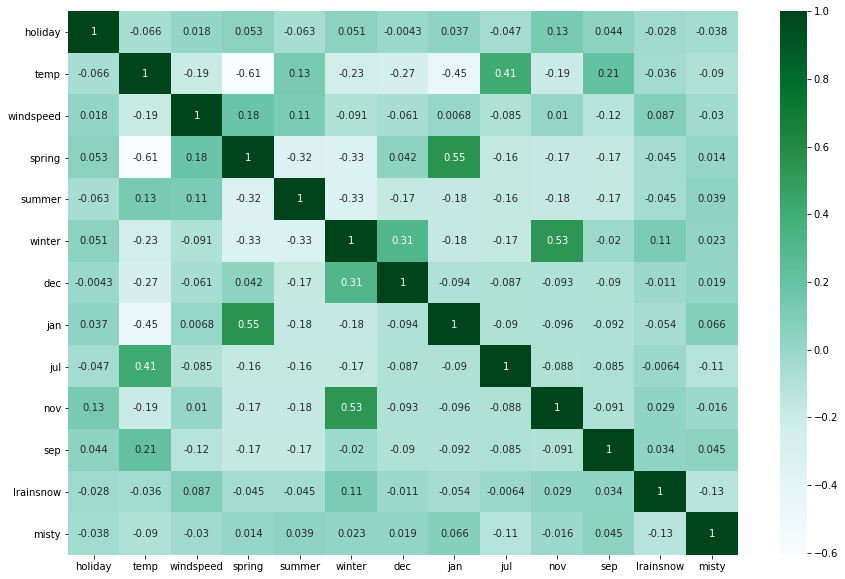

In [532]:
# Heatmap for remaining variables

plt.figure(figsize=(15, 10))
sns.heatmap(X_train6.corr(), annot=True, cmap='BuGn')
plt.show()

#### Observations
- `temp` has a high correlation with `jul`

#### Decision
Because of the high correlation with temp <br>
`Drop jul`

### 6.3.7 Model 7
- X_train7 = ['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer', 'winter', 'dec', 'jan', 'nov', 'sep', 'lrainsnow', 'misty'] 
- X_train_lm7 is the df with the constant
- lr7 is the linear model`

In [533]:
# Dropping jul to get X_train7

X_train7 = X_train6.drop(['jul'], axis=1)
X_train7.head(1)

,yr,holiday,temp,windspeed,spring,summer,winter,dec,jan,nov,sep,lrainsnow,misty
653,1,0,0.509887,0.300794,0,0,1,0,0,0,0,0,0


In [534]:
# VIF values of X_train7

cal_vif(X_train7)

,Features,VIF
3,windspeed,4.66
2,temp,3.88
4,spring,2.76
6,winter,2.75
0,yr,2.07
5,summer,1.90
9,nov,1.80
8,jan,1.65
12,misty,1.56
7,dec,1.46


In [535]:
# Adding a constant to get X_train_lm7

X_train_lm7 = sm.add_constant(X_train7)
X_train_lm7.head(1)

,const,yr,holiday,temp,windspeed,spring,summer,winter,dec,jan,nov,sep,lrainsnow,misty
653,1.0,1,0,0.509887,0.300794,0,0,1,0,0,0,0,0,0


In [536]:
# Fitting the model

lr7 = sm.OLS(y_train, X_train_lm7).fit()

In [537]:
# Summary

lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.6
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          4.31e-186
Time:                        21:05:23   Log-Likelihood:                 501.81
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     496   BIC:                            -916.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2394      0.032      7.432      0.000       0.176       0.303
yr             0.2349      0.008     28.606      0.000       0.219       0.251
holiday       -0.0908      0.026     -3.469      0.001      -0.142      -0.039
temp           0.4236      0.036     11.740      0.000       0.353       0.495
windspeed     -0.1593      0.025     -6.276      0.000      -0.209      -0.109
spring        -0.0600      0.021     -2.833      0.005      -0.102      -0.018
summer         0.0481      0.015      3.297      0.001       0.019       0.077
winter         0.1006      0.017      5.761      0.000       0.066       0.135
dec           -0.0451      0.018     -2.537      0.011      -0.080      -0.010
jan           -0.0525      0.018     -2.843      0.005      -0.089      -0.016
nov           -0.0417      0.019     -2.174      0.030      -0.079      -0.004
sep            0.0818      0.016      4.976      0.000       0.050       0.114
lrainsnow     -0.2938      0.025    -11.870      0.000      -0.342      -0.245
misty         -0.0800      0.009     -9.153      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       74.119   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.334
Skew:                          -0.746   Prob(JB):                     1.55e-40
Kurtosis:                       5.530   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observations
The VIF and p values are all in the accepted range. The model looks good. There is very low multicollinearity between the predictor variables and the p values for all the predictors is significant.<br>
For now, we will consider this as our final model (Unless our test data doesn't yield similar results)


In [538]:
lr7.params

const        0.239423
yr           0.234878
holiday     -0.090839
temp         0.423611
windspeed   -0.159255
spring      -0.059974
summer       0.048122
winter       0.100637
dec         -0.045116
jan         -0.052486
nov         -0.041664
sep          0.081832
lrainsnow   -0.293808
misty       -0.080015
dtype: float64

## 7. Final Model Interpretation

### 7.1 Coeffecients
The equation of the best fitted model is: <br>
`cnt = 0.239423 + (0.234878*yr) + (-0.090839*holiday) + (0.423611*temp) + (-0.159255*windspeed) + (-0.059974*spring) + (0.048122*summer) + (0.100637*winter) + (-0.045116*dec) + (-0.052486*jan) + (-0.041664*nov) + (0.081832*sep) + (-0.293808*lrainsnow) + (-0.080015*misty)`
<br><br>
The coeffecients do represent the relation I observed intuitively in the scatter plot.

### 7.2 Rsquared
The Rsquared is a measure of how close the data is to the fitted line. A Rsqaured value of 100% indicates that the model is able to explain 100% of the variance in the data <br>
Our model has a Rsquared of `83.7` which tells us that the our model can explain 83.7% of the variance in our training data.

### 7.3 F Statistic
The F Statistic is an indicator of the overall significance of the model. The F-test of overall significance indicates whether your linear regression model provides a better fit to the data than a model that contains no independent variables. Here the null hypothesis all of the regression coefficients are equal to zero. <br>

The value of Prob(F) is the probability that the null hypothesis for the full model is true (i.e., that all of the regression coefficients are zero).  For example, if Prob(F) has a value of 0.01000 then there is 1 chance in 100 that all of the regression parameters are zero.  This low a value would imply that at least some of the regression parameters are nonzero and that the regression equation does have some validity in fitting the data. <br>
<br>

Our model has a F statistic of `196.6` which tells us that the overall model is highly significant. <br>
Our model also has a very low Prob(F) of `4.31e-186` which indicates that our regression equation does have some validity in fitting the data.

## 8. Residual Analysis of Training Data
There are certain assumptions related to Linear Regression which we need to verify. <br>

### 8.1 To check if there is a Linear Relationship between X and y
In multiple regression models, nonlinearity or nonadditivity may be revealed by systematic patterns in plots of the residuals versus individual independent variables. The absence of such features affirms the linear relationship between X and y.

In [539]:
# y_train_pred is the values predicted using our model

y_train_pred = lr7.predict(X_train_lm7)
y_train_pred

653    0.743028
576    0.777463
426    0.481050
728    0.367436
482    0.580001
         ...   
526    0.735051
578    0.810486
53     0.247543
350    0.251306
79     0.319133
Length: 510, dtype: float64

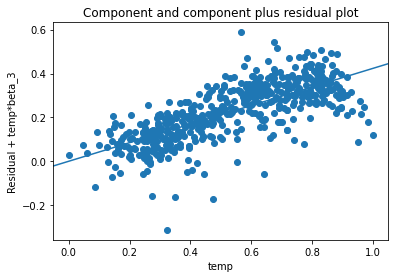

In [540]:
# Plotting Residuals vs Temp

sm.graphics.plot_ccpr(lr7, 'temp')
plt.show()

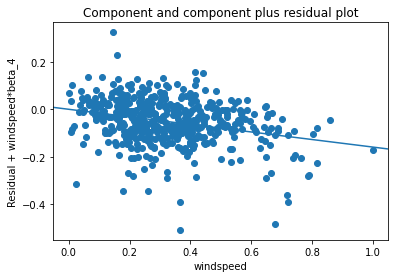

In [541]:
# Plotting Resiudals vs lrainsow

sm.graphics.plot_ccpr(lr7, 'windspeed')
plt.show()

We can see that linearity is well preserved in the above plots between the model and predictor variables. <br> <br>
<b>`There is a Linear Relationship between X and y` </b>

### 8.2 To check if Error terms are Normally Distributed
The best test for normally distributed errors is a normal probability plot or normal quantile plot of the residuals. These are plots of the fractiles of error distribution versus the fractiles of a normal distribution having the same mean and variance. If the distribution is normal, the points on such a plot should fall close to the diagonal reference line.

In [542]:
# Checking y_train_pred

y_train_pred

653    0.743028
576    0.777463
426    0.481050
728    0.367436
482    0.580001
         ...   
526    0.735051
578    0.810486
53     0.247543
350    0.251306
79     0.319133
Length: 510, dtype: float64

In [543]:
# Calculating the residuals

res = y_train - y_train_pred
res.head()

653    0.121215
576    0.050195
426   -0.015795
728   -0.163340
482   -0.097028
dtype: float64

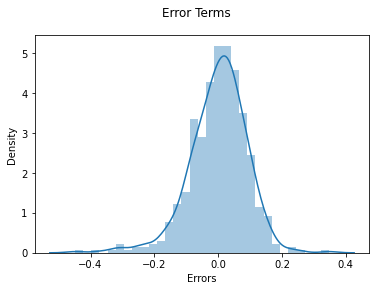

In [544]:
# Plotting the residuals

fig = plt.figure()
sns.distplot(res)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

We see that the error terms are normally distributed. <br>
Additionally, we can use a Q-Q plot to check if the error terms are normally distributed. If all the points plotted on the graph perfectly lies on a straight line then we can clearly say that this distribution is Normally distribution. (I have elaborated on this concept in the Subjective Questions)

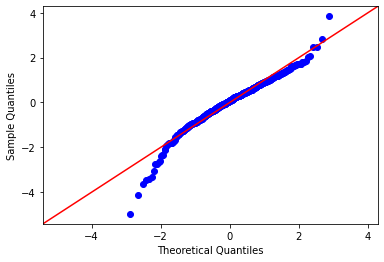

In [545]:
# Plotting a Normal Q-Q plot

sm.qqplot(res, fit=True, line='45')
plt.show()

The points plotted on the graph do in fact fall on the straight line. This further confirms that the error terms are normally distributed.

#### `Residuals are Normally Distributed`

### 8.3 Independance of Error Terms 
The best test for serial correlation is to look at a residual time series plot (residuals vs. row number) and a table or plot of residual autocorrelations. The Durbin-Watson statistic provides a test for significant residual autocorrelation at lag 1: the DW stat is approximately equal to 2(1-a) where a is the lag-1 residual autocorrelation, so ideally it should be close to 2.0--say, between 1.4 and 2.6 for a sample size of 50. The closer it is 2, the less the auto-correlation between the various variables.

In [546]:
# Durbin-Watson value for Final Model

round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4)

2.0467

Our model has a DW value of `2.0467`. <br>There is almost no auto-correlation. Therefore this suggests that our residuals are indeed independant of each other. <br> <br>
<b>`Error terms are independant of each other`</b>

### 8.4 Homoscedasticity - Error terms have constant variance at different values of X
A scatterplot of residuals versus predicted values is good way to check for homoscedasticity.  There should be no clear pattern in the distribution; if there is a cone-shaped pattern the data is heteroscedastic.

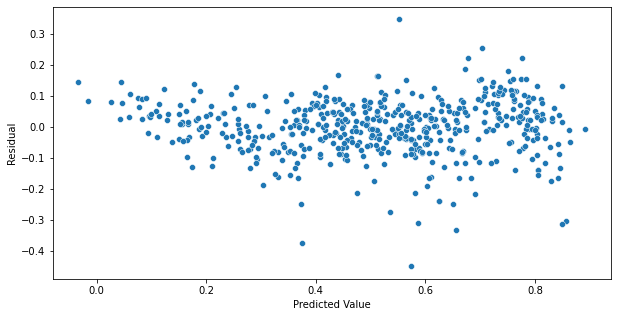

In [547]:
# Plotting the scatter plot

plt.figure(figsize=(10,5))
sns.scatterplot(y_train_pred, res)
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.show()

We can see that there is no clear pattern in the distribution. This affirrms that our error terms have constant variance at different values of X. <br> <br>
<b>`Error terms are homoscedastic`</b>

## 9. Making Predictions using Final Model
Now that we have fitted the model and verified the assumptions of Linear Regression, it's time to go ahead and make predictions using the final, i.e. sevent model - lr7

In [548]:
# Checking our test set

bikes_test.shape

(219, 30)

In [549]:
# Checking columns in test set

bikes_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul',
       'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu',
       'tue', 'wed', 'lrainsnow', 'misty'],
      dtype='object')

### 9.1 Re-scaling the Test Data
We will apply `scaler()` to all the numerical variables in the dataset. We will only use scaler.transform, as we want to use the metrics that the model learned from the training data to be applied on the test data. In other words, we want to prevent the information leak from train to test dataset

In [550]:
# Define the numerical variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [551]:
# Scaling

bikes_test[num_vars] = scaler.transform(bikes_test[num_vars])
bikes_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,lrainsnow,misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


In [552]:
# Verifying

bikes_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,lrainsnow,misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 9.2 Separating bikes_test to X_test and y_test

In [553]:
# Separating

y_test = bikes_test.pop('cnt')
X_test = bikes_test

### 9.3 Selecting variables in X_test that were part of our final model

In [554]:
# Columns in final model

col = X_train7.columns
col

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'dec', 'jan', 'nov', 'sep', 'lrainsnow', 'misty'],
      dtype='object')

In [555]:
# Re-defining X_test to contain only these columns

X_test = X_test[col]
X_test.head()

,yr,holiday,temp,windspeed,spring,summer,winter,dec,jan,nov,sep,lrainsnow,misty
184,0,1,0.831783,0.084219,0,0,0,0,0,0,0,0,1
535,1,0,0.901354,0.153728,0,1,0,0,0,0,0,0,0
299,0,0,0.511964,0.334206,0,0,1,0,0,0,0,0,1
221,0,0,0.881625,0.339570,0,0,0,0,0,0,0,0,0
152,0,0,0.817246,0.537414,0,1,0,0,0,0,0,0,0


### 9.4 Adding constant to X_test to get X_test_lm7

In [556]:
# Adding constant to get X_test_lm7

X_test_lm7 = sm.add_constant(X_test)
X_test_lm7.head(1)

,const,yr,holiday,temp,windspeed,spring,summer,winter,dec,jan,nov,sep,lrainsnow,misty
184,1.0,0,1,0.831783,0.084219,0,0,0,0,0,0,0,0,1


### 9.5 Making predictions using Final Model

In [557]:
# Obtaining y_pred

y_pred = lr7.predict(X_test_lm7)
y_pred.head()

184    0.407509
535    0.879765
299    0.423694
221    0.558811
152    0.548154
dtype: float64

## 10. Model Evaluation

### 10.1 Plotting y_test vs y_pred to understand the spread

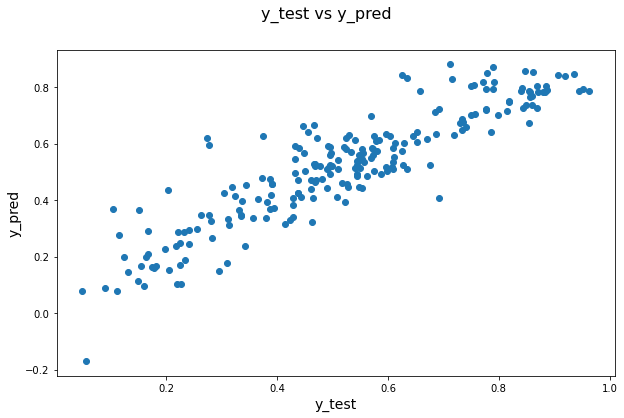

In [558]:
# The plot

fig = plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 16)               
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 14)   
plt.show()

### 10.2 Comparing the Rsquared values & Adjusted Rsquared values

In [559]:
# Importing the required package
 
from sklearn.metrics import r2_score

In [560]:
# Rsquared value for Test Set

r2test = round(r2_score(y_test, y_pred),4)
r2test

0.8116

In [561]:
# Rsquared value for Test Set

r2train  = round(r2_score(y_train, y_train_pred),4)
r2train 

0.8375

#### To calculate Adjusted Rsquared: <br> <br>

$ R^{2}_{adj} = 1 - \frac{(1-R^{2})*(n-1)}{(n-p-1)}$

In [564]:
# Adjusted Rsquared value for Test Set

# Number of rows in test dataset is n

n = X_test.shape[0]

# Number of predictors is the shape along axis 1

p = X_test.shape[1]

# Find the Adjusted R-squared using the formula

adjusted_r2 = round(1-(1-r2test)*(n-1)/(n-p-1),4)
adjusted_r2

0.7997

<b>Adjusted Rsquared value for Training Set: (As shown in our summary table for lr7)</b>

Adj. R-squared for Training Set:	`0.833` <br>
Adj. R-squared for Test Set: `0.7997`

In [565]:
%%html
<style>
table {float: left}
</style>

### Comparing Model Train and Test Rsquared Statistics

<table>
<thead>
<tr>
<th>Measurement</th>
<th>Train Dataset</th>
<th>Test Dataset</th>
</tr>
</thead>
<tbody>
<tr>
<td>$R^{2}$</td>
<td>81%</td>
<td>83%</td>
</tr>
<tr>
<td>$ R^{2}_{adj}$</td>
<td>79%</td>
<td>83%</td>
</tr>
</tbody>
</table>

### 10.3 Calculating RMSE 
`Root Mean Square Error (RMSE)` is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. <br>
Lower values of RMSE indicate better fit. 

In [566]:
# Importing the required package 

import math
from sklearn.metrics import mean_squared_error

In [567]:
# Calculating RMSE

RMSE = round(math.sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

0.0946

The mean squared error is `0.0946` which is a very small value in comparison to the range of our dependant variable. This indicates that our model has good fit.

## 11. Conclusion

Our Final Model is: <br>
`cnt = 0.239423 + (0.234878*yr) + (-0.090839*holiday) + (0.423611*temp) + (-0.159255*windspeed) + (-0.059974*spring) + (0.048122*summer) + (0.100637*winter) + (-0.045116*dec) + (-0.052486*jan) + (-0.041664*nov) + (0.081832*sep) + (-0.293808*lrainsnow) + (-0.080015*misty)`

In [568]:
# To get an overview of the coeffecients

lr7.params.sort_values(ascending=False)

temp         0.423611
const        0.239423
yr           0.234878
winter       0.100637
sep          0.081832
summer       0.048122
nov         -0.041664
dec         -0.045116
jan         -0.052486
spring      -0.059974
misty       -0.080015
holiday     -0.090839
windspeed   -0.159255
lrainsnow   -0.293808
dtype: float64

### As per our Final Model, the top predictors that influence the bike bookings are:
- `temp` : A coeffecient value of 0.42 indicates that the temperature has a significant impact on the bike rentals. Higher temperatures see more people renting bikes.
- `yr` : A coeffecient of 0.23 indicatest that the bike bookings are increasing each year. However, we now know that 2020 would have seen sharp decline in the demand for bikes because of the Covif-19 pandemic. Our model could not have foretold that.
- `lrainsnow` : A coeffecient of -0.29 indicates that light rain or snow deter people from renting bikes. 
- `windspeed` : A coeffecient of -0.15 indicatese that high wind speeds also deter people from renting bikes.

### Suggestions based on our Model
I would recommend giving due importance to these four variables while devising a business plan to maximize rental booking. <br>
- I have observed that higher temperatures and favourable weather conditions have a positive effect on bike rentals. Therefore, I would recommend increasing availability and promotions during the summer months to further increase bike rentals. 

### Possible Improvements
- If we had additional variables describing the `number of the bike rentals by regions`, we could further derive insights about which regions have the highest demand and subsequently take decisions to maximize rentals there.
- If we had a variables describing the `number of bike rentals by age`, we could derivce insights about our ideal customer profile. We could  identify which age groups use our services the most and then take decisions to improve rentals for the same.

### by `Aaron Mathew Alex`